# Testes de hipóteses

### SME0221 Inferência Estatística

por **Cibele Russo**

**ICMC/USP - São Carlos SP**





### Qual teste escolher?


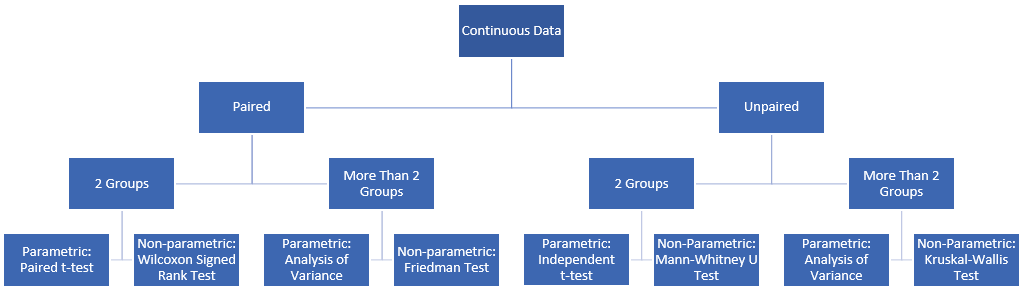

Fonte: https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e

## Teste a média de uma população com a variância conhecida

$X_i \sim N(\mu, \sigma^2)$ com $\sigma^2$ conhecido

$X_1, \ldots, X_n$ amostra aleatória 

Considere avaliar

$H_0: \mu = \mu_0$ contra

$H_1: \mu < \mu_0$

$RC = \{\bar{x} \in \mathbb{R}; \bar{x}< x_c\}$

Exemplo

$H_0: \mu =18$ contra

$H_1: \mu<18$

$RC = \{\bar{x} \in \mathbb{R}; \bar{x}< x_c\}$

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Dados do exercício

mu0 = 18
sigma = 6
n=30
xc = norm.ppf(0.05)*(sigma/np.sqrt(n)) + mu0
                             
print('RC = {xbarra <', np.round(xc,2), '}')

RC = {xbarra < 16.2 }


In [ ]:
# xbarra observado e decisão do teste

xbarra = 16

if xbarra < xc: print ('Rejeito H0')

Rejeito H0


In [ ]:
# Nível descritivo do teste

z_obs = (xbarra - mu0)/(sigma/np.sqrt(n))

print('valor-p', np.round(norm.cdf(z_obs),3))

valor-p 0.034


### Teste de normalidade dos dados: Shapiro Wilk

$X_1, \ldots, X_n$ amostra aleatória 

$H_0: X_i \sim Normal$ contra

$H_1:  X_i $ tem outra distribuição


In [ ]:
# Fonte: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

from scipy import stats
rng = np.random.default_rng()
x = stats.norm.rvs(loc=5, scale=3, size=100, random_state=rng)
shapiro_test = stats.shapiro(x)
shapiro_test


ShapiroResult(statistic=0.9716626405715942, pvalue=0.02967333234846592)

In [ ]:
shapiro_test[0]

0.9898614883422852

In [ ]:
shapiro_test.pvalue

0.4708138406276703

In [ ]:
#decisão do teste

if shapiro_test.pvalue < 0.05: print ('Rejeito H0') 
else: print ('Não rejeito H0')

Não rejeito H0


## Teste a média de uma população com a variância desconhecida

$X_i \sim N(\mu, \sigma^2)$ com $\sigma^2$ desconhecido

$X_1, \ldots, X_n$ amostra aleatória 

Considere avaliar

$H_0: \mu =\mu_0$ contra

$H_1: \mu>\mu_0$

$RC = \{T \in \mathbb{R}; T > t_c\}$

Exemplo:

$H_0: \mu =30$ contra

$H_1: \mu>30$


In [ ]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Dados do exercício

mu0 = 30
s = 3
n=25

tc = mu0-t.ppf(0.05, n-1)*(s/np.sqrt(n)) 
                             
print('RC = {t >', np.round(tc,2), '}')

RC = {t > 31.03 }


In [ ]:
# t observado e decisão do teste

tobs = 31.5

if tobs > tc: print ('Rejeito H0')
else: print('Não rejeito H0')

Rejeito H0


In [ ]:
# Nível descritivo do teste

print('valor-p', np.round(t.cdf(z_obs, n-1),3))

valor-p 0.04


In [ ]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Dados do exercício

mu0 = 0
s = 3
n=25

tc = mu0-t.ppf(0.05, n-1)*(s/np.sqrt(n)) 
                             
print('RC = {xbarra >', np.round(tc,2), '}')

RC = {xbarra > 31.03 }


In [ ]:
# t observado e decisão do teste

tobs = 31.5

if tobs > tc: print ('Rejeito H0')
else: print('Não rejeito H0')

Rejeito H0


In [ ]:
# Nível descritivo do teste

print('valor-p', np.round(t.cdf(z_obs, n-1),3))

valor-p 0.04


## Notas reais e declaradas - Teste T pareado

In [ ]:
import pandas as pd

dados = pd.read_csv('NotasP1.csv', decimal=',', index_col=0, sep=';',na_values='-')
dados.head()


,Nota P1,Nota declarada
Id Aluno,,
1,0.6,3.0
2,1.6,NaN
3,1.6,1.6
4,2.3,NaN
5,3.0,3.6


In [ ]:
dados['Diferença'] = dados['Nota P1']-dados['Nota declarada'] 
np.asarray(dados['Diferença'])

array([-2.4,  nan,  0. ,  nan, -0.6,  nan,  nan,  0.1, -0.4,  nan, -2.7,
       -0.9, -0.6,  1. ,  nan,  2.7,  1.9, -0.7,  2. ,  0.4, -1.5,  1.3,
        1.6,  1. , -0.7,  nan,  nan,  3.3,  0. , -0.5,  0.5,  3.2, -0.6,
        1.7,  1.3,  1.4,  1. ])

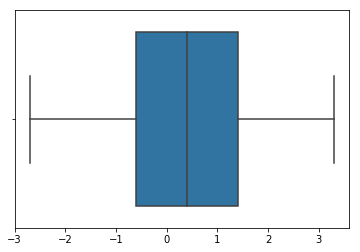

In [ ]:
import seaborn as sns
sns.boxplot(x=dados['Nota P1']-dados['Nota declarada'])

In [ ]:
df1 = pd.DataFrame(dados['Nota P1'])
df1.rename(columns={'Nota P1': 'Nota'}, inplace=True)
df1['Tipo'] = 'Nota P1'

df2 = pd.DataFrame(dados['Nota declarada'])
df2.rename(columns={'Nota declarada': 'Nota'}, inplace=True)
df2['Tipo'] = 'Nota declarada'

dados_empilhados = pd.concat([df1, df2], verify_integrity=True,ignore_index=True)
dados_empilhados

,Nota,Tipo
0,0.6,Nota P1
1,1.6,Nota P1
2,1.6,Nota P1
3,2.3,Nota P1
4,3.0,Nota P1
...,...,...
69,9.4,Nota declarada
70,7.3,Nota declarada
71,7.7,Nota declarada
72,8.0,Nota declarada


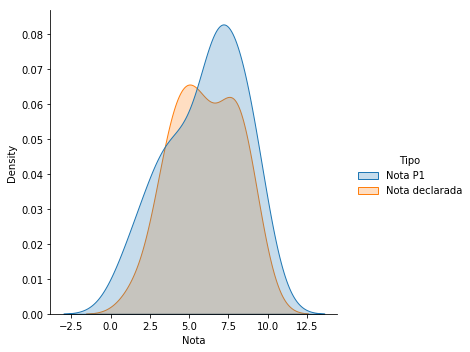

In [ ]:
sns.displot(data=dados_empilhados, x='Nota', hue='Tipo', kind='kde', fill=True)

In [ ]:
shapiro_test = stats.shapiro(np.asarray(dados['Diferença'].dropna()))
shapiro_test

ShapiroResult(statistic=0.9763895869255066, pvalue=0.7403369545936584)

In [ ]:
dados['Diferença'].describe()

count    29.000000
mean      0.441379
std       1.502027
min      -2.700000
25%      -0.600000
50%       0.400000
75%       1.400000
max       3.300000
Name: Diferença, dtype: float64

In [ ]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

# Dados do exercício

mu0 = 0
s = 1.5
n = 29

tc = mu0-t.ppf(0.025, n-1)*(s/np.sqrt(n)) 
tc_ = mu0+t.ppf(0.025, n-1)*(s/np.sqrt(n)) 
                             
print('RC = {t <', np.round(tc_,2), 'ou t >', np.round(tc,2), '}')

RC = {t < -0.57 ou t > 0.57 }


In [ ]:
tobs = (0.441379 - 0)/(s/np.sqrt(n))
tobs


1.5845991049388135

In [9]:
.4414/(1.5/np.sqrt(29))

1.5846744972461135

In [ ]:
if ((tobs > tc) or (tobs < tc_)) : print ('Rejeito H0')
else: print('Não rejeito H0')

Rejeito H0
